In [26]:
#Загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
import numpy as np
import datetime
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = 12, 5

In [27]:
from tsfresh import extract_features

In [28]:
#Загрузка Data Frame из https://www.kaggle.com
df_new = pd.read_csv('daily-min-temperatures.csv')

In [29]:
df_new.columns = ['ds', 'y']

In [30]:
df_new

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [31]:
#Генерируются признаки с помощью extract_features
d_extract = extract_features(df_new, column_id='ds', n_jobs=4)

Feature Extraction: 100%|██████████| 20/20 [00:53<00:00,  2.65s/it]


In [33]:
d_extract

,y__variance_larger_than_standard_deviation,y__has_duplicate_max,y__has_duplicate_min,y__has_duplicate,y__sum_values,y__abs_energy,y__mean_abs_change,y__mean_change,y__mean_second_derivative_central,y__median,...,y__permutation_entropy__dimension_5__tau_1,y__permutation_entropy__dimension_6__tau_1,y__permutation_entropy__dimension_7__tau_1,y__query_similarity_count__query_None__threshold_0.0,"y__matrix_profile__feature_""min""__threshold_0.98","y__matrix_profile__feature_""max""__threshold_0.98","y__matrix_profile__feature_""mean""__threshold_0.98","y__matrix_profile__feature_""median""__threshold_0.98","y__matrix_profile__feature_""25""__threshold_0.98","y__matrix_profile__feature_""75""__threshold_0.98"
1981-01-01,0.0,0.0,0.0,0.0,20.7,428.49,NaN,NaN,NaN,20.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,0.0,0.0,0.0,0.0,17.9,320.41,NaN,NaN,NaN,17.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-03,0.0,0.0,0.0,0.0,18.8,353.44,NaN,NaN,NaN,18.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-04,0.0,0.0,0.0,0.0,14.6,213.16,NaN,NaN,NaN,14.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,0.0,0.0,0.0,0.0,15.8,249.64,NaN,NaN,NaN,15.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,0.0,0.0,0.0,0.0,14.0,196.00,NaN,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-28,0.0,0.0,0.0,0.0,13.6,184.96,NaN,NaN,NaN,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-29,0.0,0.0,0.0,0.0,13.5,182.25,NaN,NaN,NaN,13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-30,0.0,0.0,0.0,0.0,15.7,246.49,NaN,NaN,NaN,15.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Избавляемся от столбцов, где NAN более 10%. А там где меньше заполняем средними значениями.
null_cols = []
zero_cols = []
for col in d_extract.columns:
    nans_percent = sum(d_extract[col].isna()) / len(d_extract) * 100
    if d_extract[col].sum() ==0:
        zero_cols.append(col)
    if nans_percent > 10:
        null_cols.append(col)
    null_cols.extend(zero_cols)
    
df_common_fin = d_extract.drop(null_cols, axis=1)
    
for col in df_common_fin.columns:
    if df_common_fin[col].isna().sum() != 0:
        df_common_fin[col] = df_common_fin[col].fillna(df_common_fin[col].mean())

In [35]:
df_common_fin

,y__sum_values,y__abs_energy,y__median,y__mean,y__length,y__root_mean_square,y__last_location_of_maximum,y__last_location_of_minimum,y__ratio_value_number_to_time_series_length,y__maximum,...,y__range_count__max_1__min_-1,y__range_count__max_1000000000000.0__min_0,y__energy_ratio_by_chunks__num_segments_10__segment_focus_0,y__count_above__t_0,y__count_below__t_0,y__lempel_ziv_complexity__bins_2,y__lempel_ziv_complexity__bins_3,y__lempel_ziv_complexity__bins_5,y__lempel_ziv_complexity__bins_10,y__lempel_ziv_complexity__bins_100
1981-01-01,20.7,428.49,20.7,20.7,1.0,20.7,1.0,1.0,1.0,20.7,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1981-01-02,17.9,320.41,17.9,17.9,1.0,17.9,1.0,1.0,1.0,17.9,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1981-01-03,18.8,353.44,18.8,18.8,1.0,18.8,1.0,1.0,1.0,18.8,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1981-01-04,14.6,213.16,14.6,14.6,1.0,14.6,1.0,1.0,1.0,14.6,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1981-01-05,15.8,249.64,15.8,15.8,1.0,15.8,1.0,1.0,1.0,15.8,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,14.0,196.00,14.0,14.0,1.0,14.0,1.0,1.0,1.0,14.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1990-12-28,13.6,184.96,13.6,13.6,1.0,13.6,1.0,1.0,1.0,13.6,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1990-12-29,13.5,182.25,13.5,13.5,1.0,13.5,1.0,1.0,1.0,13.5,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1990-12-30,15.7,246.49,15.7,15.7,1.0,15.7,1.0,1.0,1.0,15.7,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [60]:
#Используем разбиение TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

In [61]:
tss = TimeSeriesSplit(6)

In [62]:
target = df_new.y

In [63]:
y=df_new.y

In [64]:
X = df_common_fin.values

In [65]:
#Обучаем дерево, заполняем массивы MSE, чтобы вывести график ошибок
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [66]:
rf = RandomForestRegressor(n_estimators=200)

In [67]:
train_mse = []
test_mse = []

for train_index, test_index in tss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    
    train_mse.append(mean_squared_error(y_train, rf.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, rf.predict(X_test)))

In [68]:
train_mse

[0.0015451035305342645,
 0.0003113897129186369,
 0.00019872844827585487,
 0.00014043016291327048,
 0.00011616439800611577,
 9.356375838925488e-05]

In [69]:
test_mse

[0.015824014395393493,
 0.00016119049904022166,
 0.00012710172744719633,
 0.00034744433781184667,
 0.00010770249520153541,
 2.6129078694812805e-05]

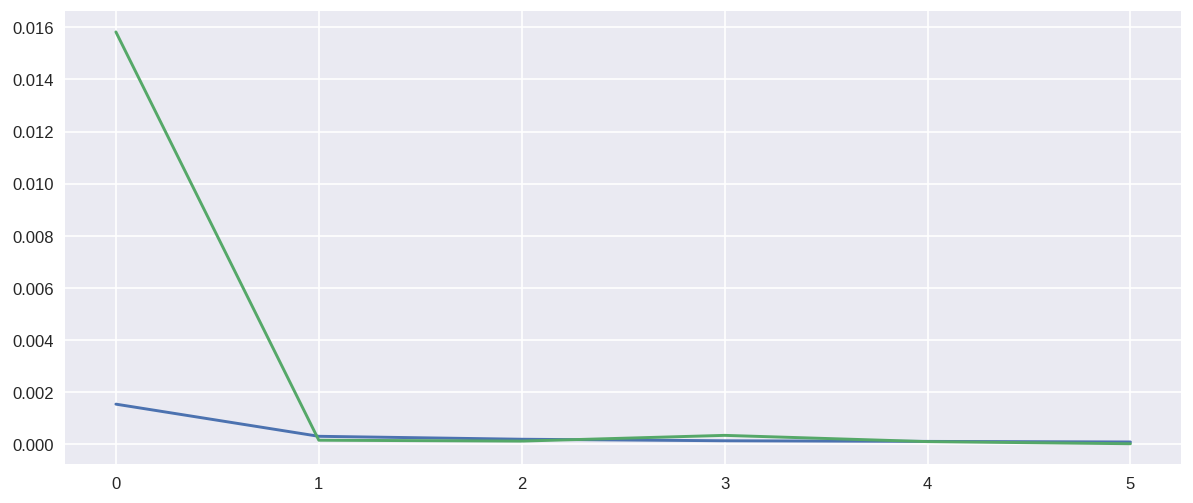

In [70]:
#Вывод графика
plt.plot(train_mse)
plt.plot(test_mse)

In [47]:
#Обучаем линейнную регрессию, заполняем массивы MSE, чтобы вывести график ошибок
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

lr_train_mse = []
lr_test_mse = []

for train_index, test_index in tss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr.fit(X_train, y_train)
    
    lr_train_mse.append(mean_squared_error(y_train, lr.predict(X_train)))
    lr_test_mse.append(mean_squared_error(y_test, lr.predict(X_test)))

In [49]:
lr_train_mse

[4.3003736415309967e-29,
 9.21546971622183e-29,
 3.0792558111469776e-28,
 2.0932274699241582e-29,
 2.567644354228798e-29,
 5.415922424418529e-29]

In [50]:
lr_test_mse

[2.0372623991847913e-29,
 9.220726554079095e-29,
 2.422387456255698e-28,
 2.057899247963849e-29,
 2.842832882603446e-29,
 4.7688988619656406e-29]

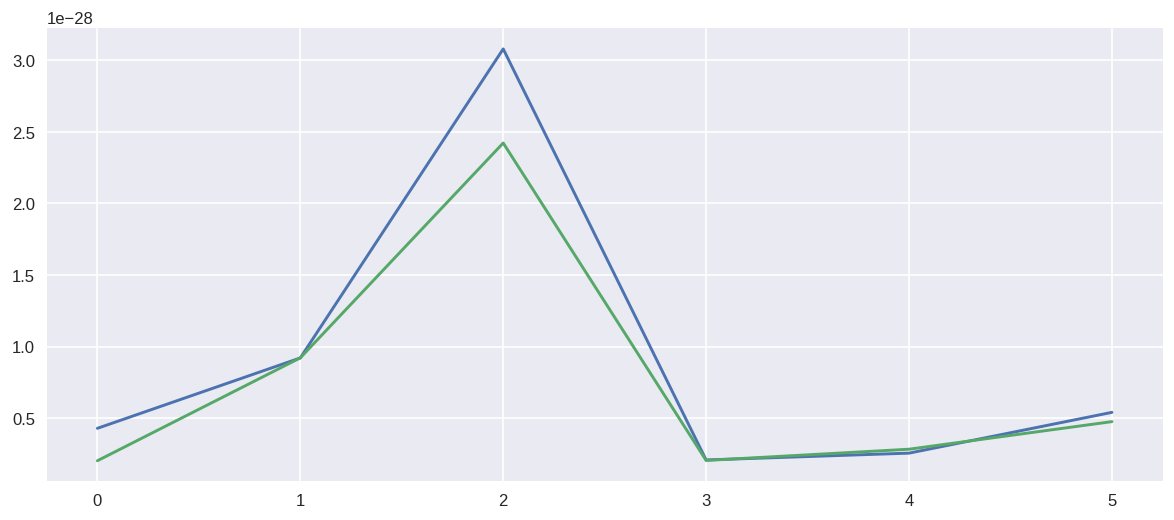

In [51]:
#Вывод графика
plt.plot(lr_train_mse)
plt.plot(lr_test_mse)

In [52]:
#Используем метод ближайших соседей, заполняем массивы MSE, чтобы вывести график ошибок
from sklearn.neighbors import KNeighborsRegressor

In [53]:
knr = KNeighborsRegressor()
knr_train_mse = []
knr_test_mse = []
for train_index, test_index in tss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knr.fit(X_train, y_train)
    knr_train_mse.append(mean_squared_error(y_train, knr.predict(X_train)))
    knr_test_mse.append(mean_squared_error(y_test, knr.predict(X_test)))

In [56]:
knr_train_mse

[0.011049618320610693,
 0.002009952153110051,
 0.0014919540229885054,
 0.001067177767129851,
 0.0006443251533742344,
 0.0005263023330137439]

In [57]:
knr_test_mse

[0.02246679462571976,
 0.0011078694817658302,
 0.000456046065259117,
 0.0012422264875239784,
 0.0002510556621880987,
 9.289827255278278e-05]

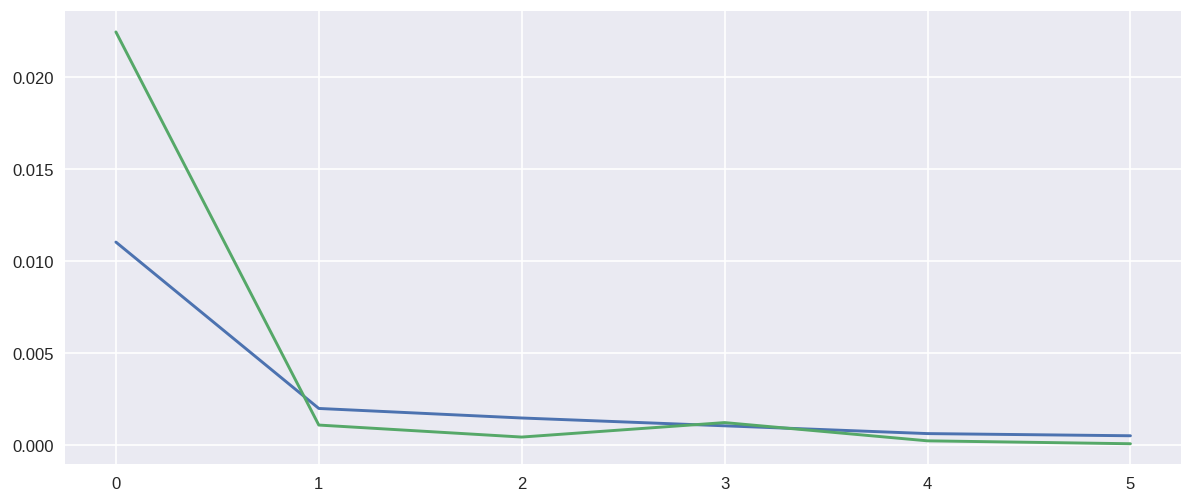

In [58]:
#Вывод графика
plt.plot(knr_train_mse)
plt.plot(knr_test_mse)

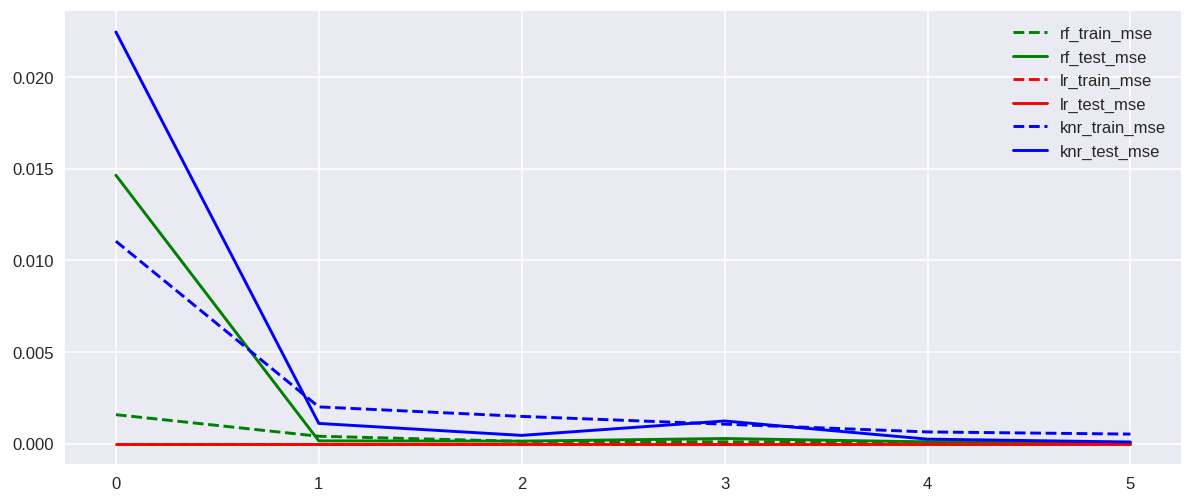

In [59]:
#Вывод ошибок на один график
plt.plot(train_mse, color = 'green', linestyle = 'dashed')
plt.plot(test_mse, color = 'green')
plt.plot(lr_train_mse, color = 'red',  linestyle = 'dashed')
plt.plot(lr_test_mse, color = 'red',)
plt.plot(knr_train_mse,color = 'blue', linestyle = 'dashed')
plt.plot(knr_test_mse, color = 'blue', )
plt.legend(['rf_train_mse', 'rf_test_mse', 'lr_train_mse', 'lr_test_mse', 'knr_train_mse', 'knr_test_mse']);